# 6장 결정 트리

- 분류, 회귀 작업, 다중 출력 작업이 가능항 다목적 머신러닝 알고리즘이다.
- 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘
- 요즘 자주 사용되는 랜덤 포레스트의 기본 구성 요소

## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame=True) # 붓꽃 데이터 셋
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

## 6.2 예측

- 꽃잎을 기준으로 새로 발견한 붓꽃의 품종의 분류를 하여한다고 가정
  
- 루트 노드에서 시작 (꽃잎의 길이가 2.45보다 작을 때)
    - 왼쪽의 자식 노드로 이동 (리프 노드 : 자식 노드를 가지지 않는 노드)
        - 리프 노드이기 때문에 추가적인 검사를 하지는 않는다. 그냥 노드에 있는 예측 클래스를 보고 결정

- 루트 노드에서 시작 (꽃잎의 길이가 2.45보다 길때)
    - 오른쪽의 자식 노드로 이동 (다시 꽃잎 너비를 1.75와 비교해서 결정)

- 장점 : 데이터 전처리가 거의 필요하지 않다.

- 노드의 정보
    - value : 각 클래스에 얼마나 많은 훈련 샘플이 있는지
    - gini : 지니 불순도 한 노드의 모든 샘플이 같은 클래스에 속해있다면 gini=0 즉 순수하다고 한다.
        - G_i = 1 - sum (P_i,k)^2
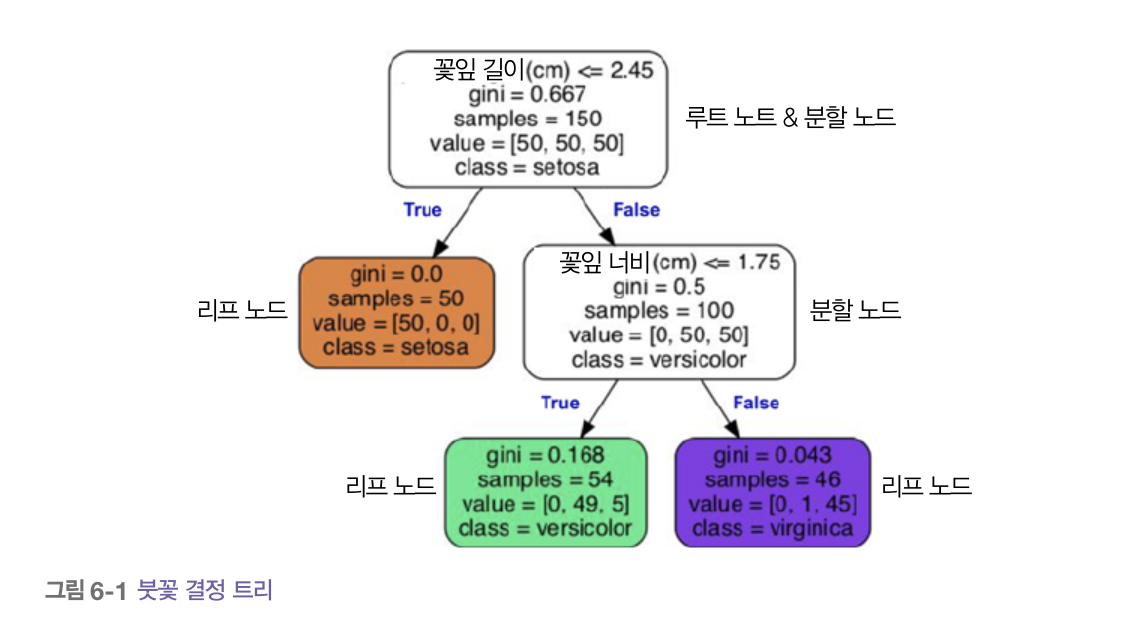

## 6.3 클래스 확률 추정

- 결정 트리는 한 샘플이 특정 클래스 k에 속할 활률을 추정할 수 있다.
- ex) 길이가 5이고 너비가 1.5인 꽃 잎 -> 위 그림의 초록색 노드 -> 확률이 0/54, 49/54, 5/54이기에 중간 걸로 출력

In [7]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.4 CART 훈련 알고리즘

- 사이킷런은 결정 트리를 훈련시키기 위해 CART 알고리즘을 사용한다.
- 먼저 훈련 세트를 하나의 특성 k의 임곗값 t_k를 사용해 두개의 서브셋으로 나눈다. (ex) 꽃잎의 길이 <= 2.45)
    - 이것을 고르는 방법은 크기에 따라 가중치가 적용된 가장 순수한 서브셋을 나울 수 있는 (k, t_k)쌍을 찾는다.
        - J(k, t_k) = (m_left / m) * G_left + (m_right / m) * G_right # 비용함수
            - G는 불순도, m은 샘플 수
- 이러한 과정을 반복해서 서브셋을 계속 나눈다.

- CART 알고리즘은 탐욕 알고리즘이다. 그렇기에 최적의 솔루션을 보장하지 않는다.

## 6.5 계산 복잡도

- 예측을 위해 결정 트리는 루트 노드에서부터 리프 노드까지 탐색해야한다.
    - 약 O(log_2(m))개의 노드를 거쳐야한다. 그래서 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다.

## 6.6 지니 불순도 또는 엔트로피

- DecisionTreeClassifier 클래스는 지니 불순도를 사용한다.
- 하지만 criterion 매개변수를 "entropy"로 지정해서 엔트로피 불순도를 사용할 수 있다.
- 사실 결과는 별 차이는 없다. 하지만 지니 불순도가 계산이 더 빠르다. 하지만 엔트로피가 더욱 균형 잡힌 트리를 만든다.

## 6.7 규제 매개변수

- 결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없다.
- 과대 적합을 막기 위해서 제한을 두어야한다.
- 결정 트리 모델의 파라미터의 수는 훈련이 시작된 후에 결정 되기 때문에 nonparametric model이라고 한다. (자유도가 높다. -> overfitting 위험)

- 규제를 통해 제한하고 overfitting을 막아야함
- max_depth를 통해 결정 트리의 최대 깊이를 제어할 수 있다.
  
- 규제 파라미터
    - max_features : 각도느에서 분할에 사용할 특성의 최대수
    - max_leaf_nodes : 리프 노드의 최대 수
    - min_samples_split : 분할되기 위해 노드가 가져야하는 최소 샘플 수
    - min_samples_leaf : 리프 노드가 생성되기 위해 가지고 있어야할 최소 샘플 수
    - min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
        - min_으로 시작하는 매개변수가 증가하거나 max_가 감소하면 규제가 커진다.

In [9]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [12]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

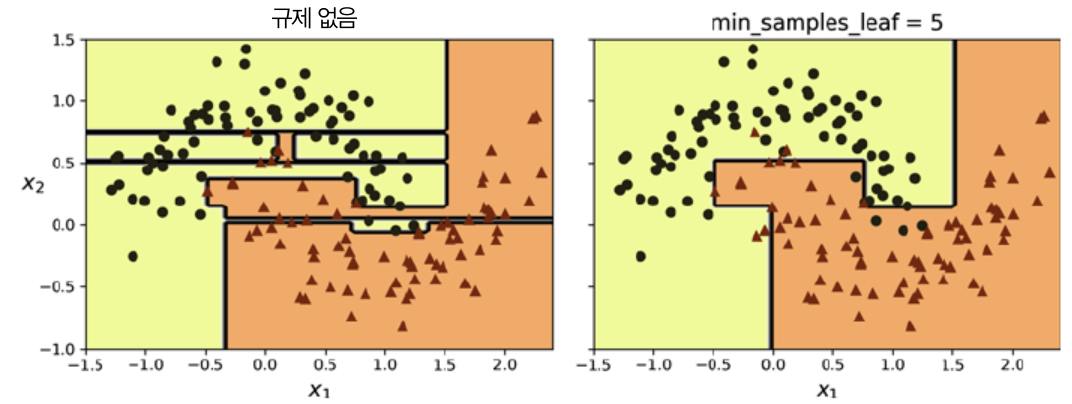

In [14]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test)) #통제 되어진 모델이 정확도가 더 높다

0.898
0.92


## 6.8 회귀
- 결정 트리는 회귀 문제에도 사용된다.
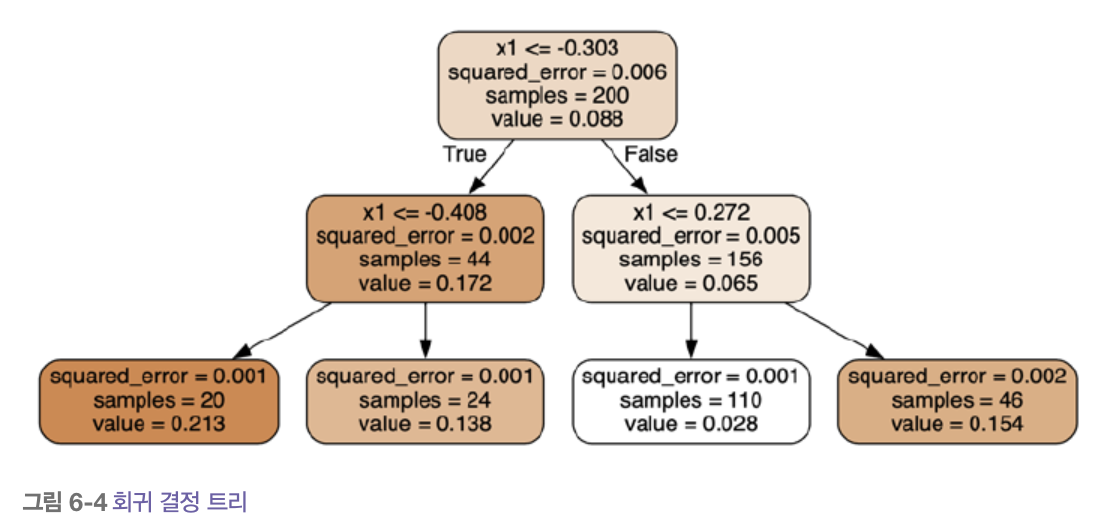

그냥 결정 트리와 다른 것은 클래스를 예측하는 것이 아닌 어떤 값을 예측한다.
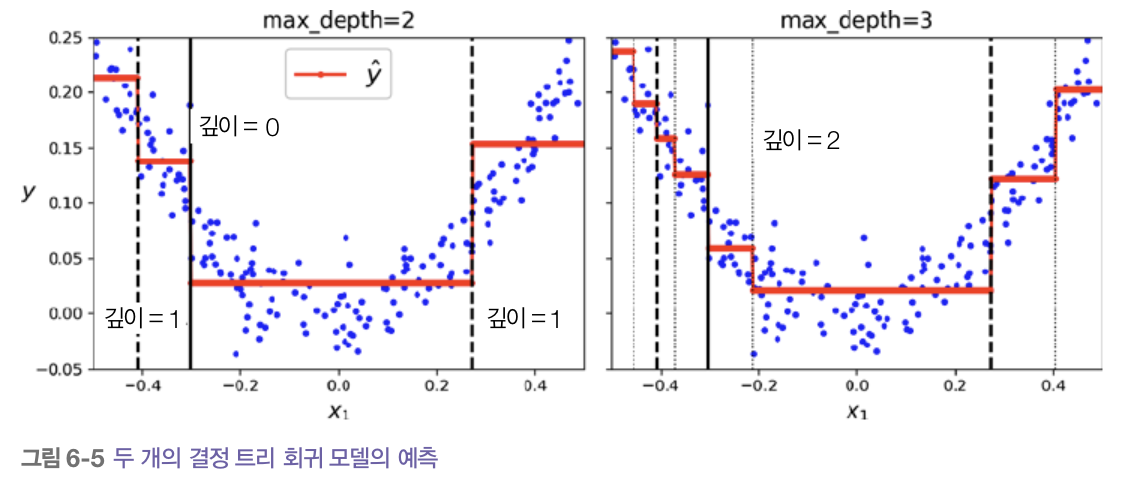

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 - 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

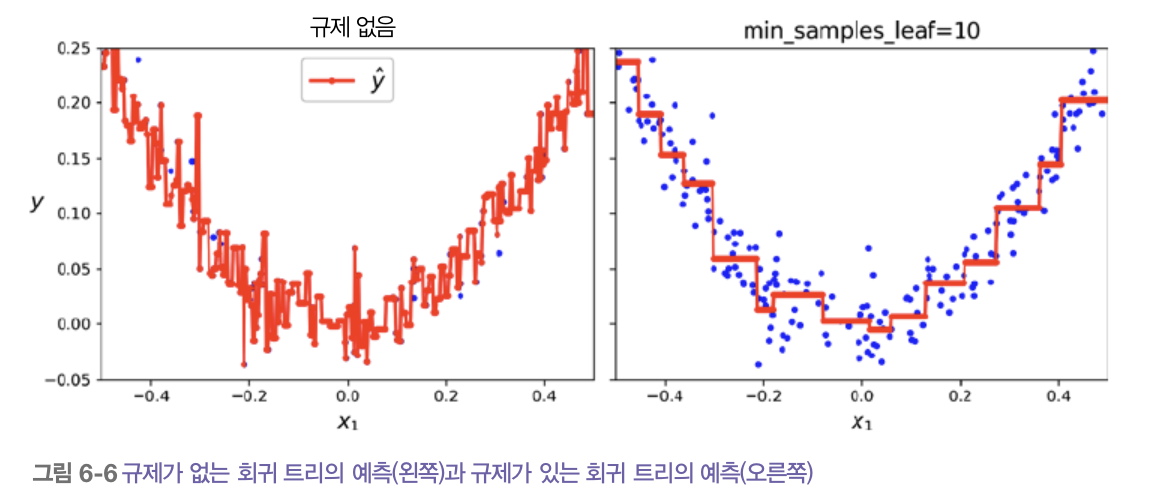
위 그림과 같이 규제가 없는 회귀모델은 overfitting 된다.

## 6.9 축 방향에 대한 민감성

- 결정 트리는 비교적 이해하고 해석하기 쉽고 사용하기편하고 여러 용도로 사용할 수 있고 성능도 뛰어나다.
- 하지만 계단 모양의 결정 경계를 만들기 때문에 데이터의 방향에 민감하다.

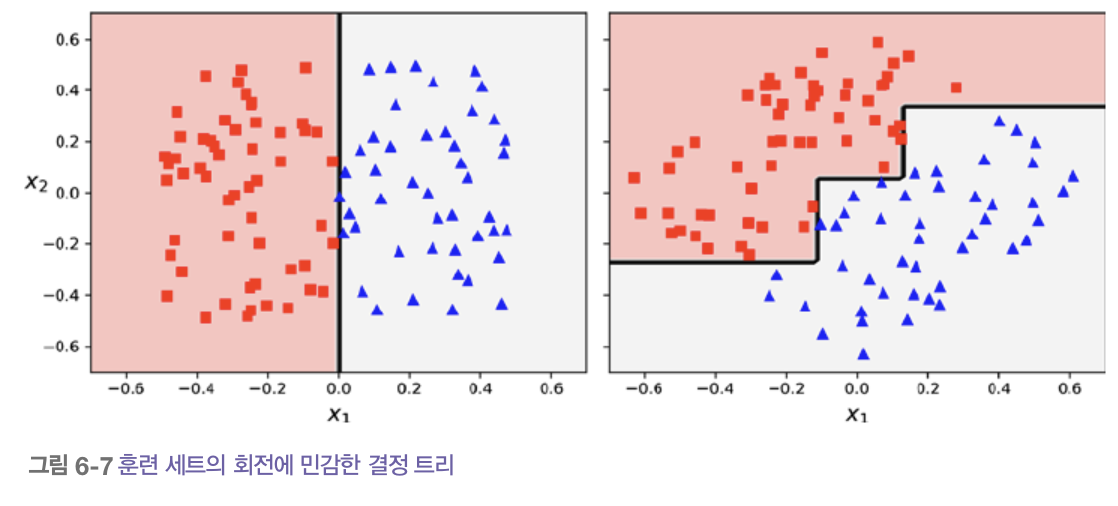

문제 제한하는 방법엔 데이터의 스케일을 조정한 다음 주성분 분석 변환(PCA)을 적용하는 것 - 특성 간의 상관관계를 줄이는 방식으로 데이터를 회전하는 것

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris) # 경계가 깔끔하다.


DecisionTreeClassifier(max_depth=2, random_state=42)

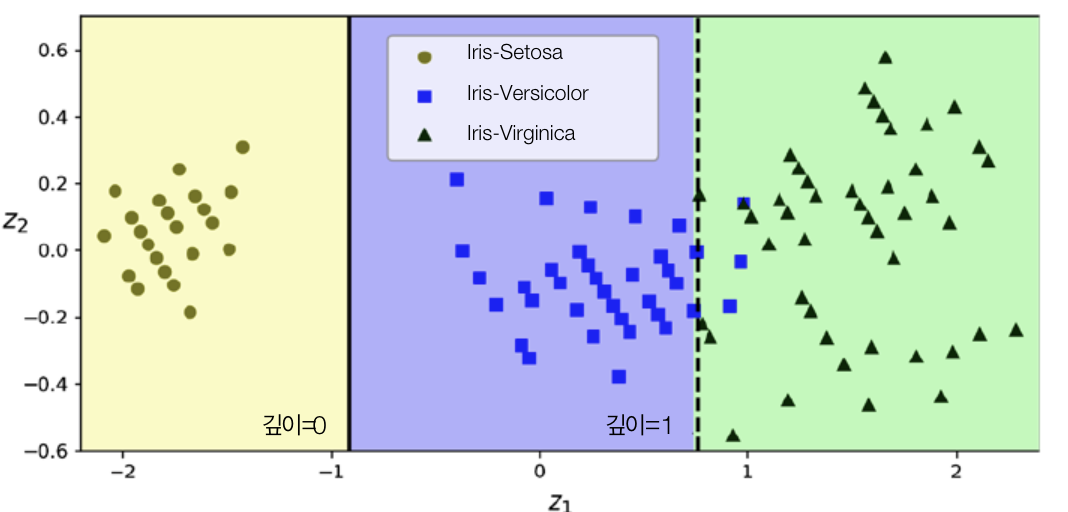
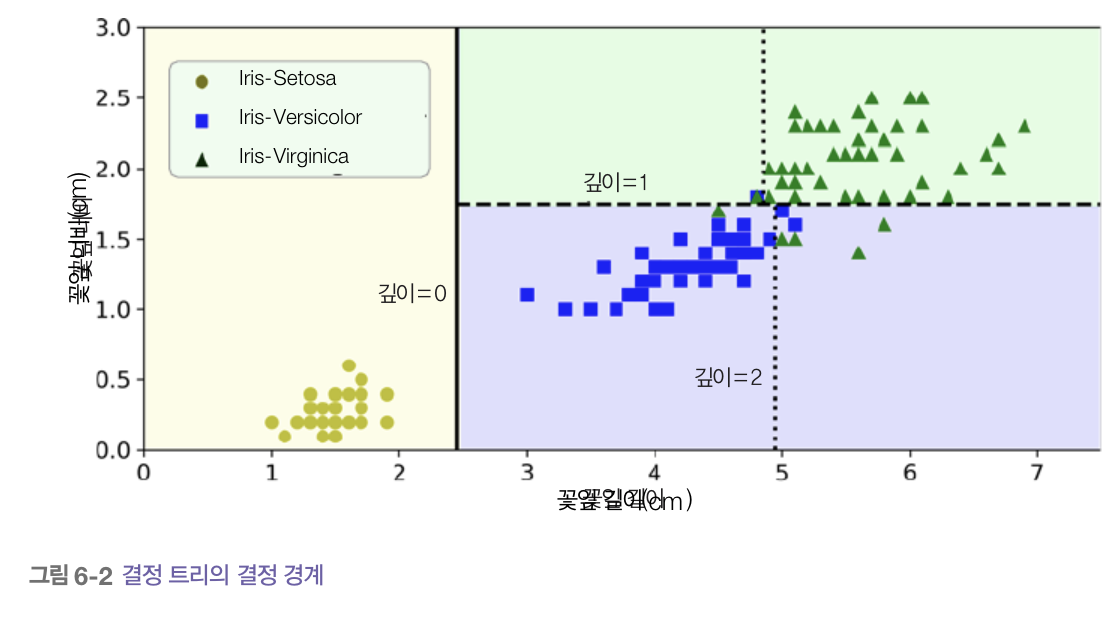

## 6.10 결정 트리의 분산 문제

- 결정 트리의 주요 문제는 분산이 상당히 크다는 것이다. 즉 하이퍼 파라미터나 데이터를 조금만 변경해도 매우 다른 모델이 생성될 수 있다.

- 여러 결정 트리의 예측을 평균하면 분상을 크게 줄일 수 있다.
    - 이러한 결정 트리의 앙상블을 랜덤 포레스트라고 한다. (현재 사용 가능한 가장 강력한 종류의 모델)